In [16]:
!pip install plotly
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [17]:
# Step 1: Load and Clean Data
def load_injury_data(filepath):
    '''
    Takes in filepath to injury data and returns cleaned DataFrame with columns, 'Player', 
    'Team', 'Date', 'Return Date', and 'Injury'.
    '''
    df = pd.read_csv(filepath)
    df['Player'] = df['Relinquished']
    df['Injury'] = df['Notes']
    df = df[['Player', 'Team', 'Date', 'Injury']]
    df['Season'] = [int(date[:4]) for date in df['Date']]
    return df

def load_team_stats(filepath):
    '''
    Takes in filepath to team stats data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', and 'W-PCT'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Season', 'W/L%', 'Playoffs']] 
    df['Season'] = [int(season[:4]) for season in df['Season']]
    return df

def load_team_performance(filepath):
    '''
    Takes in filepath to team performance data and returns cleaned DataFrame with columns, 'TEAM', 
    'SEASON', 'BENCH_PTS', and 'BENCH_MIN'.
    '''
    df = pd.read_csv(filepath)
    df = df[['Team', 'Year', 'Pace', 'OPtg', 'DRtg', 'SOS']]
    df['Season'] = df['Year']
    df = df.drop(columns=['Year'])
    return df

def compute_injury_counts_by_team_year(filepath):
    '''
    Loads NBA injury data and returns a DataFrame showing injury counts per team per year.
    '''
    df = pd.read_csv(filepath)
    df = df[['Date', 'Team', 'Relinquished']]
    df = df[[type(date) != float and type(team) != float for date, team in zip(df['Date'], df['Team'])]]
    df['Year'] = [int(date[:4]) for date in df['Date']]
    injury_counts = df.groupby(['Team', 'Year']).size().reset_index(name='Injury_Count')

    return injury_counts

# Load Data
injuries_df = load_injury_data('data/nba_injuries.csv')
team_stats = load_team_stats('data/Team_Records.csv')
team_perf = load_team_performance('data/advanced_stats_total.csv')
injury_counts = compute_injury_counts_by_team_year("data/nba_injuries.csv")

bad_teams = [
    'Colonels (ABA)', 'Squires (ABA)', 'Chaparrals (ABA)', 'Tams (ABA)',
    'Nets (ABA)', 'Spirits (ABA)', 'Stars (ABA)', 'Nuggets (ABA)'
]

bad_teams_stats = [
    'Texas Chaparrals*',
    'Dallas Chaparrals',
    'Dallas Chaparrals*'
]

# Remove bad rows:
injuries_df = injuries_df[~injuries_df['Team'].isin(bad_teams)]

team_stats = team_stats[~team_stats['Team'].isin(bad_teams_stats)]

#Strip whitespace
injuries_df['Team'] = injuries_df['Team'].str.strip()
team_stats['Team'] = team_stats['Team'].str.strip()


In [18]:
team_name_mapping = {
    '76ers': 'Philadelphia 76ers',
    'Bucks': 'Milwaukee Bucks',
    'Bulls': 'Chicago Bulls',
    'Cavaliers': 'Cleveland Cavaliers',
    'Celtics': 'Boston Celtics',
    'Clippers': 'Los Angeles Clippers',
    'Grizzlies': 'Memphis Grizzlies',
    'Hawks': 'Atlanta Hawks',
    'Heat': 'Miami Heat',
    'Hornets': 'Charlotte Hornets',
    'Jazz': 'Utah Jazz',
    'Kings': 'Sacramento Kings',
    'Knicks': 'New York Knicks',
    'Lakers': 'Los Angeles Lakers',
    'Magic': 'Orlando Magic',
    'Mavericks': 'Dallas Mavericks',
    'Nets': 'Brooklyn Nets',
    'Nuggets': 'Denver Nuggets',
    'Pacers': 'Indiana Pacers',
    'Pelicans': 'New Orleans Pelicans',
    'Pistons': 'Detroit Pistons',
    'Raptors': 'Toronto Raptors',
    'Rockets': 'Houston Rockets',
    'Spurs': 'San Antonio Spurs',
    'Suns': 'Phoenix Suns',
    'Thunder': 'Oklahoma City Thunder',
    'Timberwolves': 'Minnesota Timberwolves',
    'Trail Blazers': 'Portland Trail Blazers',
    'Warriors': 'Golden State Warriors',
    'Wizards': 'Washington Wizards',
    
    # Historical mappings
    'Atlanta Hawks*': 'Atlanta Hawks',
    'Boston Celtics*': 'Boston Celtics',
    'Brooklyn Nets*': 'Brooklyn Nets',
    'Charlotte Hornets*': 'Charlotte Hornets',
    'Chicago Bulls*': 'Chicago Bulls',
    'Cleveland Cavaliers*': 'Cleveland Cavaliers',
    'Dallas Mavericks*': 'Dallas Mavericks',
    'Denver Nuggets*': 'Denver Nuggets',
    'Detroit Pistons*': 'Detroit Pistons',
    'Golden State Warriors*': 'Golden State Warriors',
    'Houston Rockets*': 'Houston Rockets',
    'Indiana Pacers*': 'Indiana Pacers',
    'Los Angeles Clippers*': 'Los Angeles Clippers',
    'Los Angeles Lakers*': 'Los Angeles Lakers',
    'Memphis Grizzlies*': 'Memphis Grizzlies',
    'Miami Heat*': 'Miami Heat',
    'Milwaukee Bucks*': 'Milwaukee Bucks',
    'Minnesota Timberwolves*': 'Minnesota Timberwolves',
    'New Orleans Pelicans*': 'New Orleans Pelicans',
    'New York Knicks*': 'New York Knicks',
    'Oklahoma City Thunder*': 'Oklahoma City Thunder',
    'Orlando Magic*': 'Orlando Magic',
    'Philadelphia 76ers*': 'Philadelphia 76ers',
    'Phoenix Suns*': 'Phoenix Suns',
    'Portland Trail Blazers*': 'Portland Trail Blazers',
    'Sacramento Kings*': 'Sacramento Kings',
    'San Antonio Spurs*': 'San Antonio Spurs',
    'Toronto Raptors*': 'Toronto Raptors',
    'Utah Jazz*': 'Utah Jazz',
    'Washington Wizards*': 'Washington Wizards',
    
    # Legacy / old franchise names
    'Zephyrs': 'Washington Wizards',
    'Rochester Royals': 'Sacramento Kings',
    'Tri-Cities Blackhawks': 'Atlanta Hawks',
    'Chicago Packers': 'Washington Wizards',
    'San Francisco Warriors': 'Golden State Warriors',
    'Syracuse Nationals': 'Philadelphia 76ers',
    'New Jersey Americans': 'Brooklyn Nets',
    'Denver Rockets': 'Denver Nuggets',
    'Capital Bullets': 'Washington Wizards',
    'Chicago Zephyrs': 'Washington Wizards',
    'San Diego Rockets': 'Houston Rockets',
    'Baltimore Bullets': 'Washington Wizards',
    'Baltimore Bullets*': 'Washington Wizards',
    'Bullets': 'Washington Wizards',
    'New Jersey Nets': 'Brooklyn Nets',
    'New Orleans Hornets': 'New Orleans Pelicans',
    'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans',
    'Seattle SuperSonics': 'Oklahoma City Thunder',
    'San Diego Clippers': 'Los Angeles Clippers',
    'Vancouver Grizzlies': 'Memphis Grizzlies',
    'Charlotte Bobcats': 'Charlotte Hornets',
    'New Orleans Jazz': 'Utah Jazz',
    'Kansas City Kings': 'Sacramento Kings',
    'Cincinnati Royals': 'Sacramento Kings',
    'St. Louis Hawks': 'Atlanta Hawks',
    'Washington Bullets': 'Washington Wizards',
    'Fort Wayne Pistons': 'Detroit Pistons',
    'Minneapolis Lakers': 'Los Angeles Lakers',
    'Buffalo Braves': 'Los Angeles Clippers',
    'Braves': 'Los Angeles Clippers',
    'Bobcats': 'Charlotte Hornets',
    'Blazers': 'Portland Trail Blazers',
    'Philadelphia Warriors': 'Golden State Warriors',
    'Kansas City-Omaha Kings': 'Sacramento Kings',
    'Milwaukee Hawks': 'Atlanta Hawks'
}

# Standardize the team names
injuries_df['Team'] = injuries_df['Team'].map(team_name_mapping)
team_stats['Team'] = team_stats['Team'].map(team_name_mapping)
team_perf['Team'] = team_perf['Team'].map(team_name_mapping)
injury_counts['Team'] = injury_counts['Team'].map(team_name_mapping)

# Drop rows with missing Team (but keep the full DataFrame)
injuries_df.dropna(subset=['Team'], inplace=True)
team_stats.dropna(subset=['Team'], inplace=True)
team_perf.dropna(subset=['Team'], inplace=True)
injury_counts.dropna(subset=['Team'], inplace=True)

                    Team  Season   W/L%                Playoffs  \
625           Miami Heat    2008  0.524  Lost E. Conf. 1st Rnd.   
575   Los Angeles Lakers    1973  0.573     Lost W. Conf. Semis   
760    San Antonio Spurs    2004  0.720              Won Finals   
542   Los Angeles Lakers    2010  0.695     Lost W. Conf. Semis   
98       New York Knicks    1952  0.671             Lost Finals   
775    San Antonio Spurs    1987  0.378  Lost W. Conf. 1st Rnd.   
722      Houston Rockets    2006  0.634  Lost W. Conf. 1st Rnd.   
298  Cleveland Cavaliers    1991  0.695    Lost E. Conf. Finals   
491         Phoenix Suns    1998  0.540  Lost W. Conf. 1st Rnd.   
80       New York Knicks    1987  0.463  Lost E. Conf. 1st Rnd.   

     Injury_Count_x  Pace   OPtg   DRtg   SOS    Year  Injury_Count_y  
625            39.0   NaN    NaN    NaN   NaN  2008.0            39.0  
575             NaN   NaN    NaN    NaN   NaN     NaN             NaN  
760            14.0  89.2  102.2   94.1  0.29 

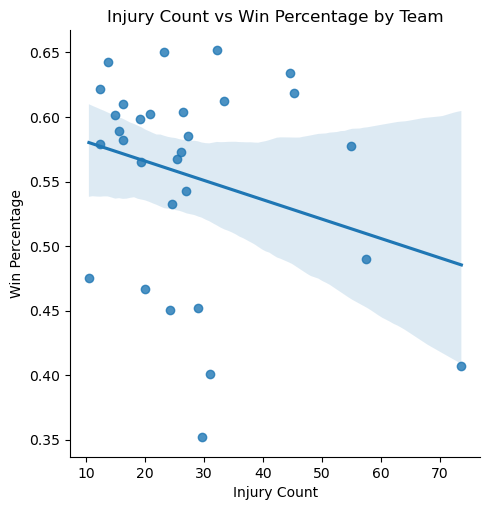

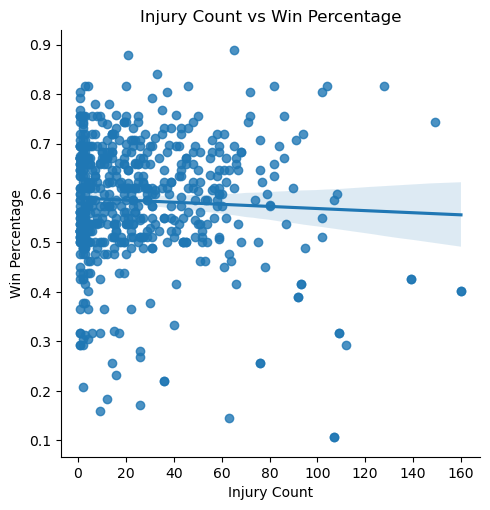

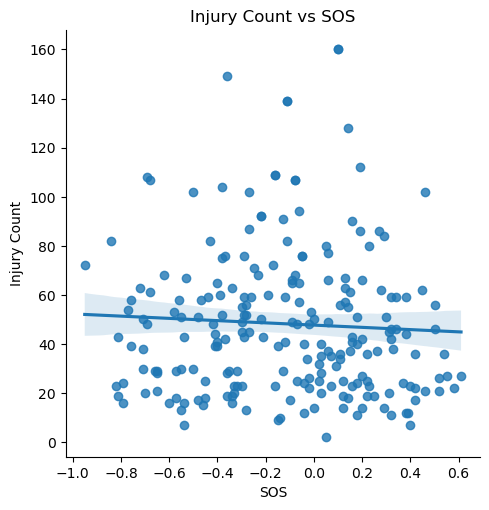

In [19]:
# Step 2: Merge Datasets
''' old version 
def merge_datasets(injuries_df, stats_df, bench_df):
    injuries_count = injuries_df.groupby(['Team', 'Season']).size().reset_index(name='Injury_Count')
    merged = stats_df.merge(injuries_count, on=['Team', 'Season'], how='left')
    merged = merged.merge(bench_df, on=['Team', 'Season'], how='left')
    
    stats_df['Season'] = [int(season) for season in stats_df['Season']]
    
    merged = merged.merge(injury_counts, left_on=['Team', 'Season'], right_on=['Team', 'Year'], how='left')
    
    return merged

merged_df = merge_datasets(injuries_df, team_stats, team_perf)
'''
def merge_datasets(injuries_df, stats_df, bench_df):
    injuries_count = injuries_df.groupby(['Team', 'Season']).size().reset_index(name='Injury_Count')
    merged = stats_df.merge(injuries_count, on=['Team', 'Season'], how='left')
    merged = merged.merge(bench_df, on=['Team', 'Season'], how='left')
    
    stats_df['Season'] = [int(season) for season in stats_df['Season']]
    
    merged = merged.merge(injury_counts, left_on=['Team', 'Season'], right_on=['Team', 'Year'], how='left')
    
    return merged

merged_df = merge_datasets(injuries_df, team_stats, team_perf)

# testing sample probably want to drop all thhe NaN stuff later?
print(merged_df.sample(n=10))


def plot_injury_vs_win_pct_team(df):
    avg = df.groupby('Team')[['Injury_Count_x','W/L%']].mean().dropna()
    
    plot = sns.lmplot(data=avg, x='Injury_Count_x', y='W/L%')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage by Team')
    plt.show()

plot_injury_vs_win_pct_team(merged_df)

def plot_injury_vs_win_pct(df):
    df = df.dropna(subset=['Injury_Count_x', 'W/L%'])

    plot = sns.lmplot(data=df, x='Injury_Count_x', y='W/L%')
    plot.set(xlabel='Injury Count', ylabel='Win Percentage', title='Injury Count vs Win Percentage')
    plt.show()

plot_injury_vs_win_pct(merged_df)

def plot_injury_vs_sos(df):
    df['SOS'] = pd.to_numeric(df['SOS'])
    df = df.dropna(subset=['Injury_Count_x', 'SOS'])

    plot = sns.lmplot(data=df, x='SOS', y='Injury_Count_x')
    plot.set(xlabel='SOS', ylabel='Injury Count', title='Injury Count vs SOS')
    plt.show()

plot_injury_vs_sos(merged_df)



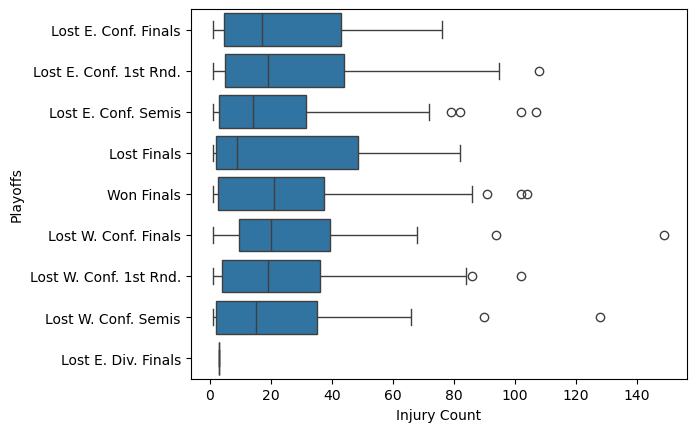

In [20]:
# Playoff run vs. Injuries in a Season
def plot_injuries_vs_playoff_sucess(df):
    #how can we implement to make data more clear?
    playoff_order = [
    'Did Not Qualify', 'Lost 1st Rnd', 'Lost E. Conf. 1st Rnd', 'Lost W. Conf. 1st Rnd',
    'Lost 2nd Rnd', 'Lost Conf. Semis', 'Lost E. Conf. Semis', 'Lost W. Conf. Semis',
    'Lost Conf. Finals', 'Lost E. Conf. Finals', 'Lost W. Conf. Finals',
    'Lost Finals', 'Won Finals']
    
    df = df.dropna(subset=['Playoffs','Injury_Count_x'])

    plot = sns.boxplot(df, x='Injury_Count_x', y='Playoffs')
    plot = plot.set(xlabel='Injury Count')
    plt.show()

plot_injuries_vs_playoff_sucess(merged_df)


In [21]:
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
#4 Hypothesis Testing source: https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb


In [22]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")      

In [23]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [24]:
# 1 Assumptions
print("Assumptions:")
print("- Observations are independent across team-season.")
print("- Injury count and win percentage are linearly related.")
print("- Injury count and win percentage are approximately normally distributed (or large sample).")

Assumptions:
- Observations are independent across team-season.
- Injury count and win percentage are linearly related.
- Injury count and win percentage are approximately normally distributed (or large sample).


In [25]:
# 2 Define Variables
df_test = merged_df.dropna(subset=['Injury_Count_x', 'W/L%'])
df_test.describe()
x = df_test['Injury_Count_x']
y = df_test['W/L%']

In [26]:
# 3 Check normality of each variable
print("H0: The data is normally distributed.")
print("H1: The data is not normally distrubted.")
print("Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed.")
print()
print("Normality check for Injury_Count_x:")
check_normality(x)

print("Normality check for W/L%:")
check_normality(y)

H0: The data is normally distributed.
H1: The data is not normally distrubted.
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed.

Normality check for Injury_Count_x:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
Normality check for W/L%:
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [27]:
# 4 Check variance of each variable.
print("H0: The variances of the samples are same.")
print("H1: The variances of the samples are different.")
print()
print("""It tests the null hypothesis that the population variances are equal.
If the resulting p-value of Levene's test is less than significance level 0.05,
the obtained differences in sample variances are unlikely to have occurred based 
on random sampling from a population with equal variances.""")
print()
print("Variance homogeneity check (Injury_Count_x vs W/L%):")
check_variance_homogeneity(x, y)

H0: The variances of the samples are same.
H1: The variances of the samples are different.

It tests the null hypothesis that the population variances are equal.
If the resulting p-value of Levene's test is less than significance level 0.05,
the obtained differences in sample variances are unlikely to have occurred based 
on random sampling from a population with equal variances.

Variance homogeneity check (Injury_Count_x vs W/L%):
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


In [28]:
# 5 Hypotheses
print("Hypotheses:")
print("H0: ρ = 0 -> No linear relationship between injury count and win percentage.")
print("1₁: ρ != 0 -> Linear relationship exists between injury count and win percentage.")

Hypotheses:
H0: ρ = 0 -> No linear relationship between injury count and win percentage.
1₁: ρ != 0 -> Linear relationship exists between injury count and win percentage.


In [29]:
# 6 Pearson correlation test
r, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: r = {r:.3f}")
print(f"p-value = {p_value:.5f}")

Pearson correlation coefficient: r = -0.049
p-value = 0.23958


In [30]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis -= Evidence of a linear relationship between injury count and win percentage.")
    if r < 0:
        print("Relationship is negative = More injuries tend to correlate with lower win percentage.")
    else:
        print("Relationship is positive = More injuries tend to correlate with higher win percentage.")
else:
    print("Fail to reject null hypothesis = No significant linear relationship detected.")

Fail to reject null hypothesis = No significant linear relationship detected.
